##                               Speech Emotion Recognition

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


In [2]:
## path to RAVDESS data
rav_path = '/kaggle/input/ravdess-emotional-speech-audio'

In [3]:
## lets make a label map for RAVDESS dataset which maps numerical value to emotion
label_map_ravdess = {
    '01' : 'neutral', '02' : 'calm', '03' : 'happy', '04' : 'sad', '05' : 'angry', '06' : 'fearful', '07' : 'disguist', '08' : 'surprised'
}

In [4]:
## Now we'll store speech file paths and corresponding emotion for RAVDESS Dataset
ravdess_file_paths = []
ravdess_labels = []

for actor in os.listdir(rav_path):
    ## path for one actor
    actor_path = os.path.join(rav_path, actor)
    ## one actor contains 60 files
    for file in os.listdir(actor_path):
        if file.startswith('0'):
            file_path = os.path.join(actor_path, file)
            ## storing the file paths in our list
            ravdess_file_paths.append(file_path)
            emotion = file[6:8]  ## why 6 to 8 index (because in string '03-01-03-01-01-01-01.wav' emotion is at index [6:8])
            ## storing emotion corresponding to that file
            ravdess_labels.append(label_map_ravdess[emotion])

In [5]:
## lets check the length of ravdess files
print(f"Total file paths : {len(ravdess_file_paths)}")
print(f"Total labels : {len(ravdess_labels)}")

Total file paths : 1440
Total labels : 1440


In [6]:
## lets make a pandas dataframe for RAVDESS data
rav_data = pd.DataFrame({
    'paths' : ravdess_file_paths,
    'emotions' : ravdess_labels
})
## print first 5 rows of data
rav_data.head()

,paths,emotions
0,/kaggle/input/ravdess-emotional-speech-audio/A...,surprised
1,/kaggle/input/ravdess-emotional-speech-audio/A...,neutral
2,/kaggle/input/ravdess-emotional-speech-audio/A...,disguist
3,/kaggle/input/ravdess-emotional-speech-audio/A...,disguist
4,/kaggle/input/ravdess-emotional-speech-audio/A...,neutral


## Combining both RAVDESS and TESS dataframes

In [7]:
rav_data.loc[0, 'paths']

'/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-08-01-01-01-02.wav'

In [8]:
import librosa

In [9]:
pip install librosa audiomentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.8/96.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 51.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
plotnine 0.14.4 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install soundfile

Note: you may need to restart the kernel to use updated packages.


In [11]:

import soundfile as sf
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift

# Define augmentations
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.2, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5)
])

# Create directory for augmented files
augmented_dir = "augmented_audio"
os.makedirs(augmented_dir, exist_ok=True)

# Process and augment data
augmented_file_paths = []
augmented_labels = []

for file_path, label in zip(ravdess_file_paths, ravdess_labels):
    # Load audio file
    audio, sr = librosa.load(file_path, sr=None)

    # Apply augmentation
    augmented_audio = augment(audio, sample_rate=sr)

    # Save augmented audio
    augmented_file_path = os.path.join(augmented_dir, os.path.basename(file_path).replace('.wav', '_augmented.wav'))
    try:
        sf.write(augmented_file_path, augmented_audio, sr)
        augmented_file_paths.append(augmented_file_path)
        augmented_labels.append(label)
    except Exception as e:
        print(f"Error writing {augmented_file_path}: {e}")



In [12]:
## path to TESS data
tess_path = '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data'

In [13]:
tess_file_paths = []
tess_labels = []

for folder in os.listdir(tess_path):
    folder_path = os.path.join(tess_path, folder)
    label = folder[4:] ## folder = OAF_Fear (take from index 4 to last)
    label = label.lower() ## converting the string to lower

    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        ## storing this file path in list
        tess_file_paths.append(file_path)
        ## storing the corresponding emotion
        tess_labels.append(label)

In [14]:
## lets make a pandas dataframe for tess data also
tess_data = pd.DataFrame({
    'paths' : tess_file_paths,
    'emotions' : tess_labels
})

## lets print first 5 rows of this dataset
tess_data.head()

,paths,emotions
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [15]:


# Define augmentations
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.2, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5)
])

# Create directory for augmented files
augmented_dir = "augmented_audio"
os.makedirs(augmented_dir, exist_ok=True)

# Process and augment data
augmented_file_paths = []
augmented_labels = []

for file_path, label in zip(tess_file_paths, tess_labels):
    # Load audio file
    audio, sr = librosa.load(file_path, sr=None)

    # Apply augmentation
    augmented_audio = augment(audio, sample_rate=sr)

    # Save augmented audio
    augmented_file_path = os.path.join(augmented_dir, os.path.basename(file_path).replace('.wav', '_augmented.wav'))
    try:
        sf.write(augmented_file_path, augmented_audio, sr)
        augmented_file_paths.append(augmented_file_path)
        augmented_labels.append(label)
    except Exception as e:
        print(f"Error writing {augmented_file_path}: {e}")


In [16]:
# Combine RAVDESS and TESS data
all_file_paths = ravdess_file_paths + tess_file_paths + augmented_file_paths
all_labels = ravdess_labels + tess_labels + augmented_labels

# Create a dataframe combining both datasets
emotion_data = pd.DataFrame({
    'paths': all_file_paths,
    'emotions': all_labels
})

# Display the first 5 rows of the combined dataframe
print(emotion_data.head())


                                               paths   emotions
0  /kaggle/input/ravdess-emotional-speech-audio/A...  surprised
1  /kaggle/input/ravdess-emotional-speech-audio/A...    neutral
2  /kaggle/input/ravdess-emotional-speech-audio/A...   disguist
3  /kaggle/input/ravdess-emotional-speech-audio/A...   disguist
4  /kaggle/input/ravdess-emotional-speech-audio/A...    neutral


In [17]:
label_mapping = {
    'disguist': 'disgust', 
    'fear': 'fearful', 
    'pleasant_surprised': 'pleasant_surprise'
}

In [18]:
emotion_data['emotions'] = emotion_data['emotions'].replace(label_mapping)


In [19]:
print(emotion_data['emotions'].unique())  # Should show the corrected list of unique emotions


['surprised' 'neutral' 'disgust' 'fearful' 'sad' 'calm' 'happy' 'angry'
 'pleasant_surprise']


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


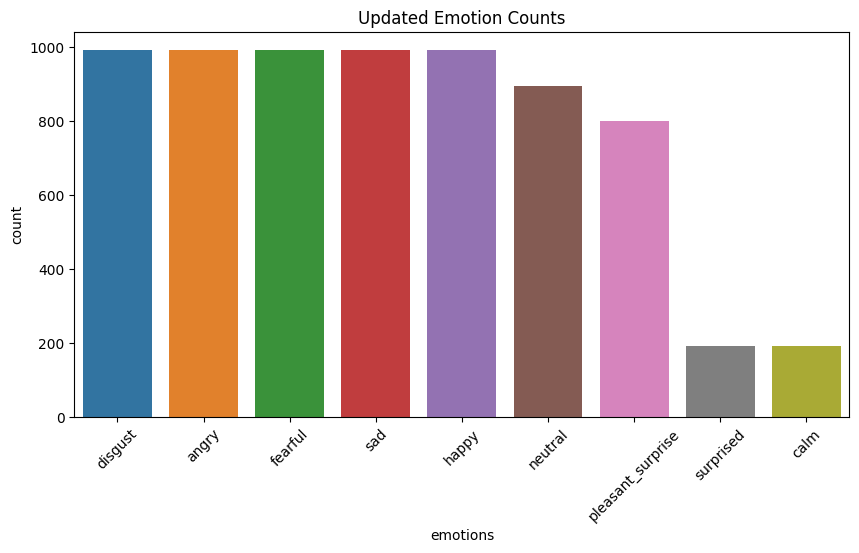

In [21]:


plt.figure(figsize=(10,5))
sns.countplot(x=emotion_data['emotions'], order=emotion_data['emotions'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Updated Emotion Counts")
plt.show()


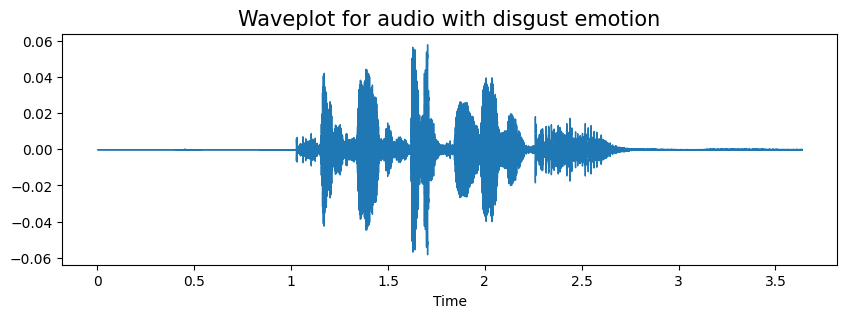

<ipython-input-22-7be65954a125>:12: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(data), ref=np.max)


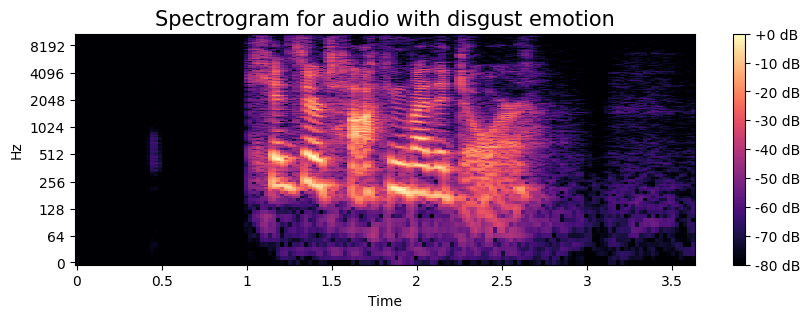

In [22]:
# Function to create waveplot
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

# Function to create spectrogram
def create_spectrogram(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    D = librosa.amplitude_to_db(librosa.stft(data), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

# Set emotion and path
emotion = 'disgust'
path = np.array(emotion_data.paths[emotion_data.emotions == emotion])[1]  # Ensure data_path has 'Path' and 'Emotions' columns

# Load audio data
data, sampling_rate = librosa.load(path)

# Generate waveplot and spectrogram
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

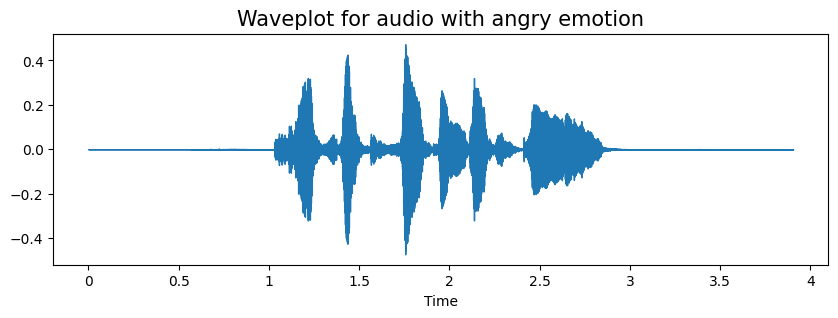

<ipython-input-22-7be65954a125>:12: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(data), ref=np.max)


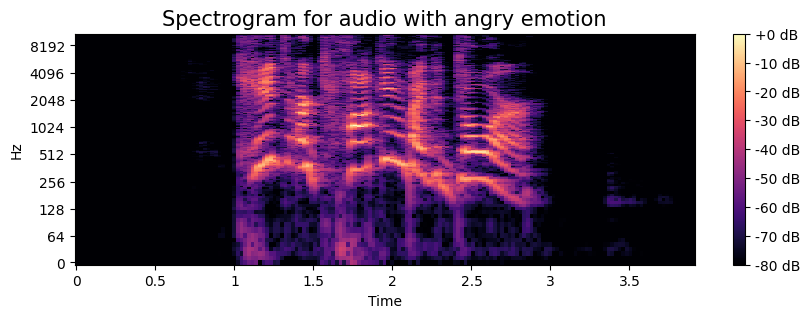

In [23]:
emotion='angry'
path = np.array(emotion_data.paths[emotion_data.emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)


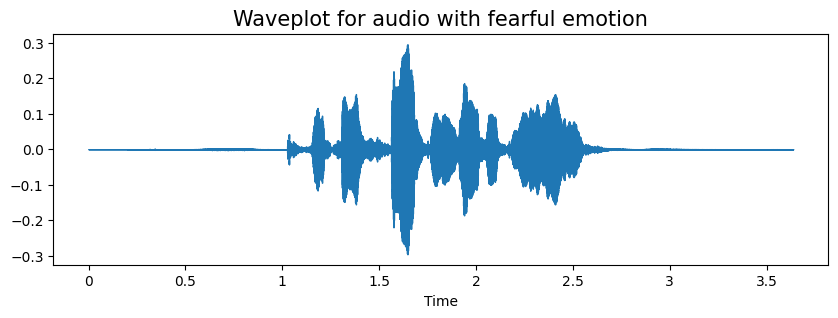

<ipython-input-22-7be65954a125>:12: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(data), ref=np.max)


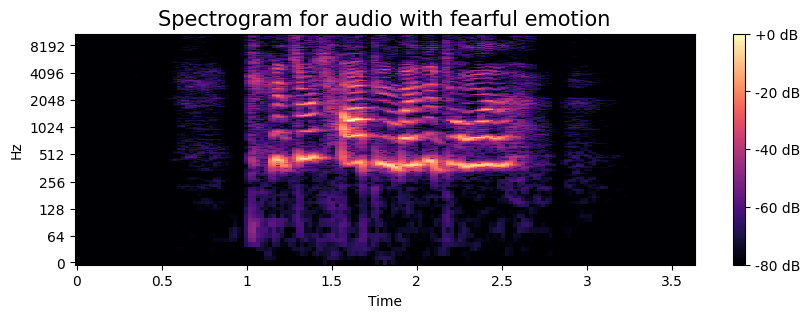

In [24]:
emotion='fearful'
path = np.array(emotion_data.paths[emotion_data.emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

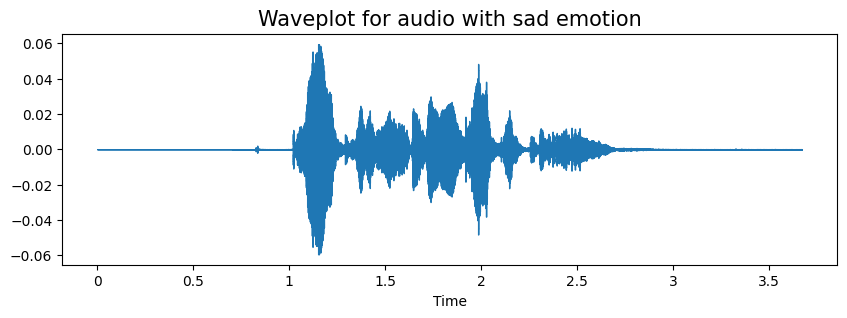

<ipython-input-22-7be65954a125>:12: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(data), ref=np.max)


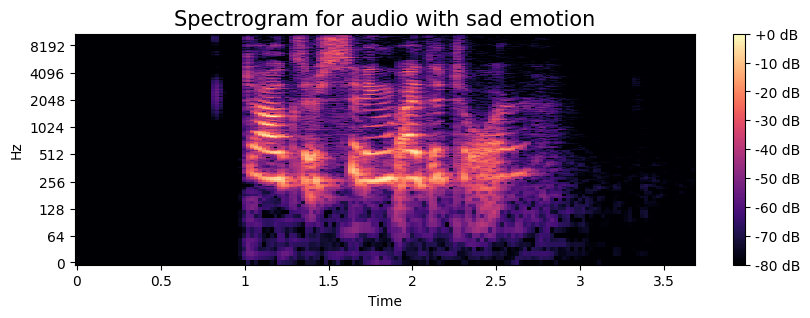

In [25]:
emotion='sad'
path = np.array(emotion_data.paths[emotion_data.emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

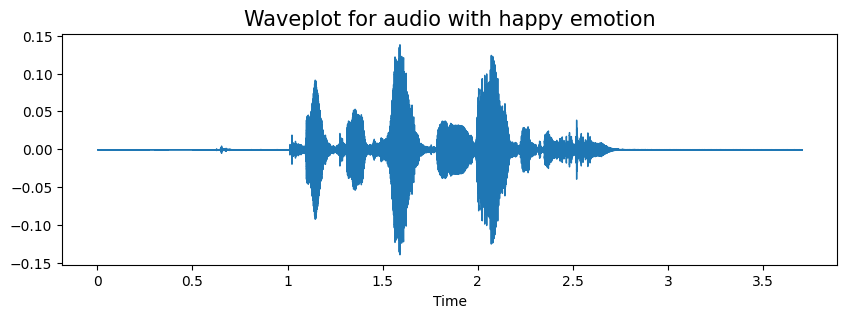

<ipython-input-22-7be65954a125>:12: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(data), ref=np.max)


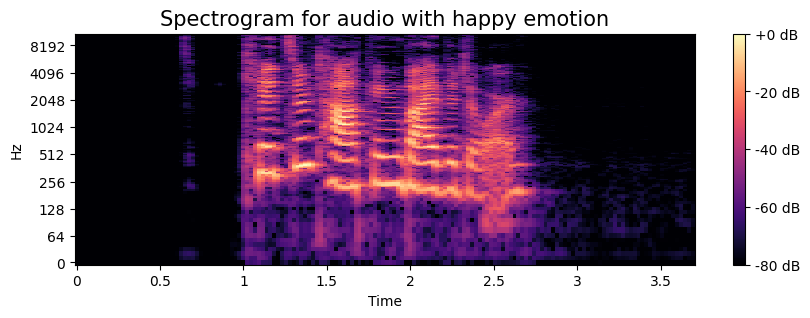

In [26]:
emotion='happy'
path = np.array(emotion_data.paths[emotion_data.emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

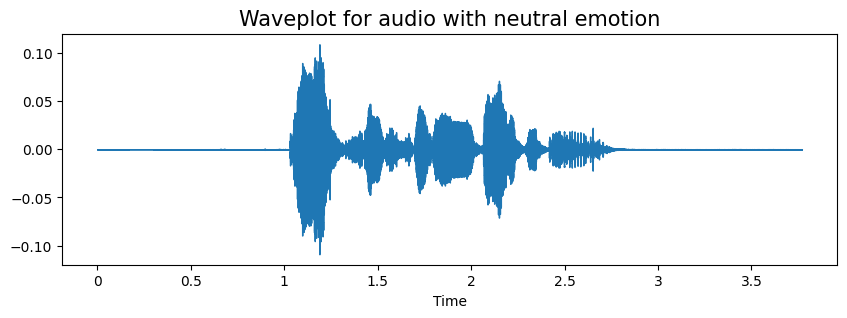

<ipython-input-22-7be65954a125>:12: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(data), ref=np.max)


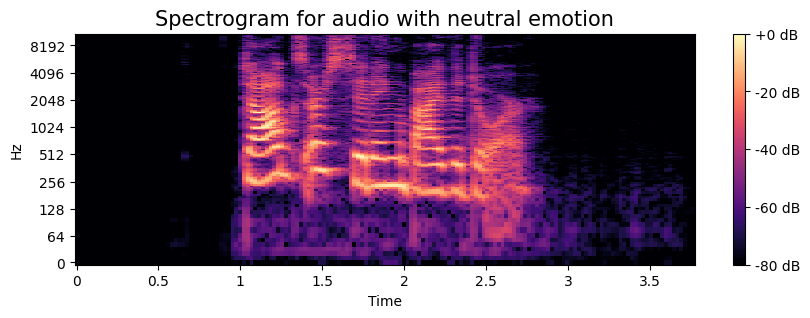

In [27]:
emotion='neutral'
path = np.array(emotion_data.paths[emotion_data.emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

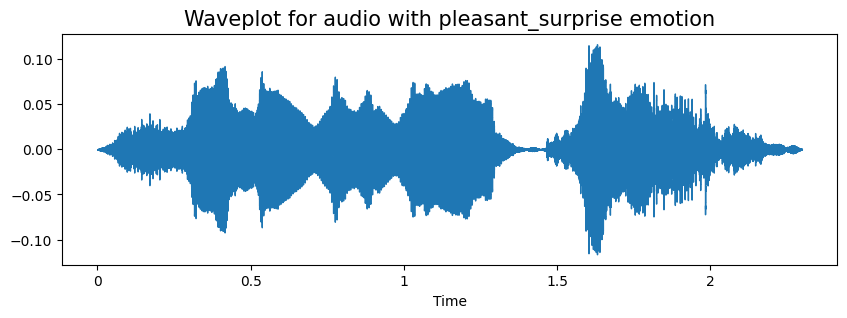

<ipython-input-22-7be65954a125>:12: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(data), ref=np.max)


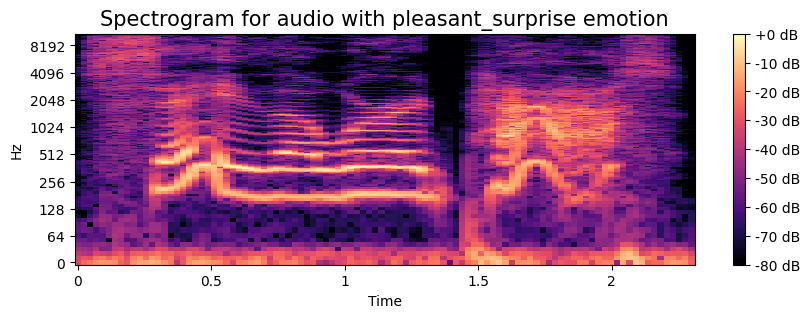

In [28]:
emotion='pleasant_surprise'
path = np.array(emotion_data.paths[emotion_data.emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

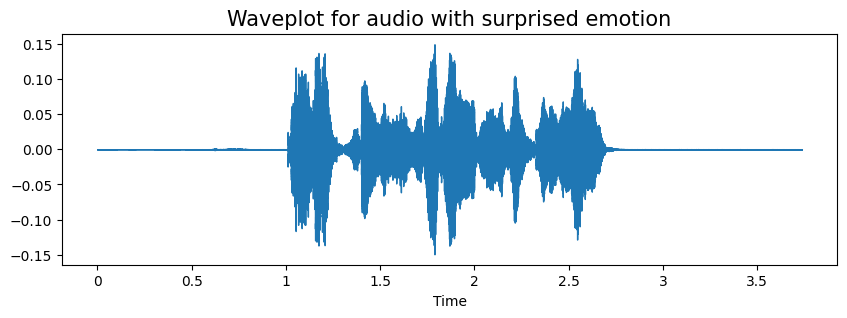

<ipython-input-22-7be65954a125>:12: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(data), ref=np.max)


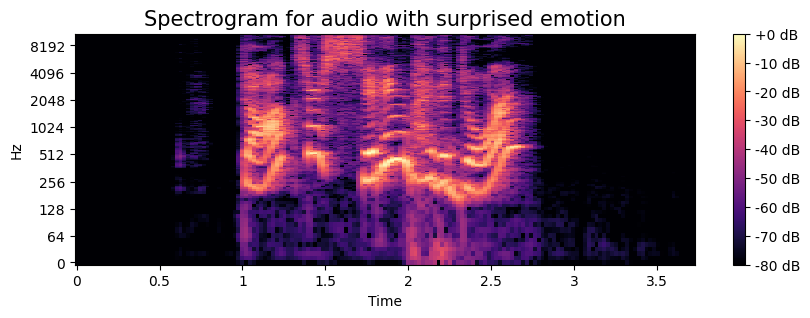

In [29]:
emotion='surprised'
path = np.array(emotion_data.paths[emotion_data.emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

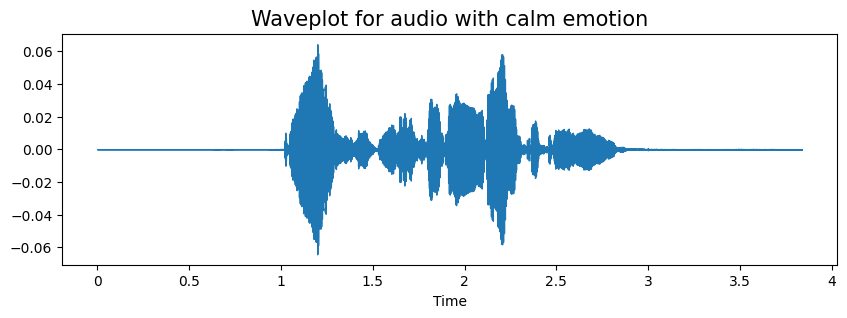

<ipython-input-22-7be65954a125>:12: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(data), ref=np.max)


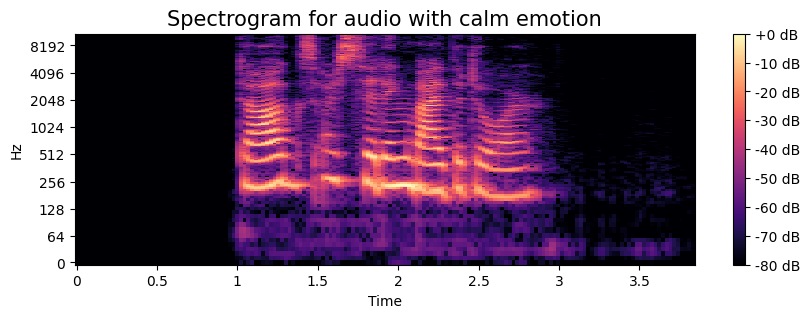

In [30]:
emotion='calm'
path = np.array(emotion_data.paths[emotion_data.emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

In [31]:
## So we'll try to extract MEL and MFCC features
mel_features = []
mfcc_features = []

## traversing all the paths in combined dataset
for i in range(len(emotion_data)):
    ## loading the audio file
    data, sample_rate = librosa.load(emotion_data.loc[i, 'paths'])
    ## extracting MEL features
    mel_features.append(np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis= 0))
    ## extracting MFCC features
    mfcc_features.append(np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc= 40).T, axis=0))

In [32]:
## lets convert both mel_features and mfcc_features list to arrays
mel_features_array = np.array(mel_features)
mfcc_features_array = np.array(mfcc_features)

## lets check shape of both
print(f"Shape of MEL features : {mel_features_array.shape}")
print(f"Shape of MFCC features : {mfcc_features_array.shape}")

Shape of MEL features : (7040, 128)
Shape of MFCC features : (7040, 40)


In [33]:
features = np.hstack((mel_features_array, mfcc_features_array))

## now lets check shape
print(f"Shape of feature data : {features.shape}")

Shape of feature data : (7040, 168)


In [34]:
## lets make a datagframe containing these features and corresponding emotions
df_features = pd.DataFrame(features)
## combine both emotion_data and df_features
data = pd.concat([emotion_data, df_features], axis=1)
## lets print first 5 rows of new data
data.head()

,paths,emotions,0,1,2,3,4,5,6,7,...,158,159,160,161,162,163,164,165,166,167
0,/kaggle/input/ravdess-emotional-speech-audio/A...,surprised,0.005195,0.001722,0.000349,0.000140,0.000114,0.002602,0.024531,0.074840,...,3.489989,4.236896,0.213406,2.605503,1.890640,4.325501,0.480753,2.482820,1.081487,1.704094
1,/kaggle/input/ravdess-emotional-speech-audio/A...,neutral,0.000012,0.000052,0.000112,0.000077,0.000056,0.000891,0.010599,0.067308,...,0.267784,3.115064,2.003131,4.280788,2.213304,2.787869,-1.610170,1.408178,-0.868951,0.794392
2,/kaggle/input/ravdess-emotional-speech-audio/A...,disgust,0.000013,0.000043,0.000094,0.000146,0.000199,0.006029,0.018402,0.057368,...,0.618273,3.815083,1.287141,1.681310,-0.308356,0.658395,-0.749000,0.957288,-0.362294,0.383185
3,/kaggle/input/ravdess-emotional-speech-audio/A...,disgust,0.000004,0.000011,0.000046,0.000119,0.000313,0.004024,0.025942,0.068099,...,-0.940127,2.509533,-0.475125,2.912231,1.758800,3.328968,1.083430,1.607952,0.068851,2.164475
4,/kaggle/input/ravdess-emotional-speech-audio/A...,neutral,0.000017,0.000077,0.000168,0.000099,0.000120,0.001180,0.013695,0.061049,...,-0.179794,2.937866,1.044165,1.760139,1.501498,4.362187,-1.211075,0.591354,-1.089706,1.280070


In [35]:
## we don't need paths column we can drop it
data_new = data.drop(columns=['paths'])
data_new.head()

,emotions,0,1,2,3,4,5,6,7,8,...,158,159,160,161,162,163,164,165,166,167
0,surprised,0.005195,0.001722,0.000349,0.000140,0.000114,0.002602,0.024531,0.074840,0.096236,...,3.489989,4.236896,0.213406,2.605503,1.890640,4.325501,0.480753,2.482820,1.081487,1.704094
1,neutral,0.000012,0.000052,0.000112,0.000077,0.000056,0.000891,0.010599,0.067308,0.132182,...,0.267784,3.115064,2.003131,4.280788,2.213304,2.787869,-1.610170,1.408178,-0.868951,0.794392
2,disgust,0.000013,0.000043,0.000094,0.000146,0.000199,0.006029,0.018402,0.057368,0.154142,...,0.618273,3.815083,1.287141,1.681310,-0.308356,0.658395,-0.749000,0.957288,-0.362294,0.383185
3,disgust,0.000004,0.000011,0.000046,0.000119,0.000313,0.004024,0.025942,0.068099,0.053077,...,-0.940127,2.509533,-0.475125,2.912231,1.758800,3.328968,1.083430,1.607952,0.068851,2.164475
4,neutral,0.000017,0.000077,0.000168,0.000099,0.000120,0.001180,0.013695,0.061049,0.191830,...,-0.179794,2.937866,1.044165,1.760139,1.501498,4.362187,-1.211075,0.591354,-1.089706,1.280070


In [36]:
## defining X (features) and y (prediction)
X = data_new.drop(columns=['emotions'])
y = data_new['emotions'].to_numpy()

In [37]:
## we need to encode y as it contains 8 classes, which are object, hence need to use OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

## how it is encoded
encoder.get_feature_names_out()

array(['x0_angry', 'x0_calm', 'x0_disgust', 'x0_fearful', 'x0_happy',
       'x0_neutral', 'x0_pleasant_surprise', 'x0_sad', 'x0_surprised'],
      dtype=object)

In [38]:
## lets check shape of y_encoded
print(f"Shape of y_encoded : {y_encoded.shape}")

Shape of y_encoded : (7040, 9)


In [39]:
y_encoded = y_encoded.toarray()
y_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [40]:
## lets split it into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, shuffle=True, random_state=42)

print(f"Shape of X_train : {X_train.shape}")
print(f"Shape of X_test : {X_test.shape}")
print(f"Shape of y_train : {y_train.shape}")
print(f"Shape of y_test : {y_test.shape}")

Shape of X_train : (5632, 168)
Shape of X_test : (1408, 168)
Shape of y_train : (5632, 9)
Shape of y_test : (1408, 9)


In [41]:
## scaling features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(5632, 168)
(1408, 168)


In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, TimeDistributed, Bidirectional
from tensorflow.keras.optimizers import Adam

In [43]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [44]:
model = Sequential()

# Add TimeDistributed Conv1D layers for feature extraction
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))

# LSTM layers
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(y_train.shape[1], activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, 1, 166, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 1, 83, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 1, 5312)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 1, 256)              │       5,571,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,745,033 (21.92 MB)

 Trainable params: 5,745,033 (21.92 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to monitor validation loss
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Stop training if val_loss doesn't improve for 10 epochs
    restore_best_weights=True
)

In [47]:
import tensorflow as tf
from tensorflow.keras.losses import CategoricalCrossentropy

# Focal loss function
def focal_loss(gamma=2.0, alpha=0.25):
    def loss_fn(y_true, y_pred):
        cce = CategoricalCrossentropy()
        cross_entropy = cce(y_true, y_pred)
        pt = tf.exp(-cross_entropy)
        focal_loss = alpha * (1 - pt) ** gamma * cross_entropy
        return focal_loss
    return loss_fn


In [48]:
from tensorflow.keras import metrics
model.compile(optimizer=Adam(learning_rate=0.001), loss=focal_loss(), metrics=['accuracy', metrics.Precision(), metrics.Recall()])

In [49]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32, verbose=1, callbacks=[early_stopping])

Epoch 1/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.2847 - loss: 0.3334 - precision: 0.7182 - recall: 0.0871 - val_accuracy: 0.6797 - val_loss: 0.0856 - val_precision: 0.8740 - val_recall: 0.5220
Epoch 2/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6862 - loss: 0.0873 - precision: 0.8813 - recall: 0.5563 - val_accuracy: 0.7457 - val_loss: 0.0499 - val_precision: 0.9209 - val_recall: 0.6534
Epoch 3/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7437 - loss: 0.0480 - precision: 0.9161 - recall: 0.6708 - val_accuracy: 0.7763 - val_loss: 0.0375 - val_precision: 0.9425 - val_recall: 0.6989
Epoch 4/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7667 - loss: 0.0412 - precision: 0.9168 - recall: 0.6948 - val_accuracy: 0.8047 - val_loss: 0.0269 - val_precision: 0.9465 - val_recall: 0.7415
Epoch 5/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7968 - loss: 0.0286 - precision: 0.9321 - recall: 0.7360 - val_accuracy: 0.8168 - v

In [50]:
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8466 - loss: 0.0138 - precision: 0.9384 - recall: 0.8150
Test Loss: 0.0118, Test Accuracy: 0.8622
Test Precision: 0.9462
Test Recall: 0.8239


Text(0.5, 1.0, 'Accuracy')

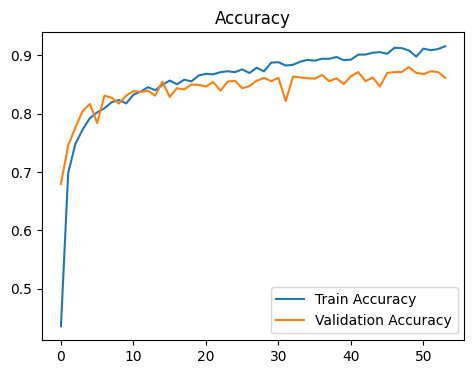

In [51]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

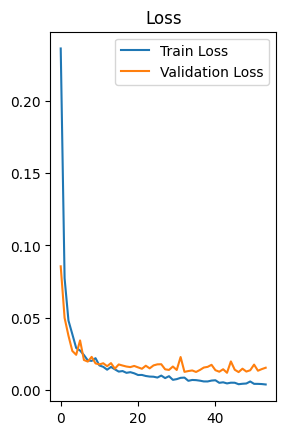

In [52]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [53]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get model predictions on the test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot labels to class indices

# Compute Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_true, y_pred, digits=4))


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0     0.8826    0.9307    0.9060       202
           1     0.3875    0.8611    0.5345        36
           2     0.8691    0.8601    0.8646       193
           3     0.9153    0.8564    0.8849       202
           4     0.8757    0.8394    0.8571       193
           5     0.9602    0.8942    0.9260       189
           6     0.9592    0.9592    0.9592       147
           7     0.9045    0.8090    0.8541       199
           8     0.4694    0.4894    0.4792        47

    accuracy                         0.8622      1408
   macro avg     0.8026    0.8333    0.8073      1408
weighted avg     0.8796    0.8622    0.8678      1408



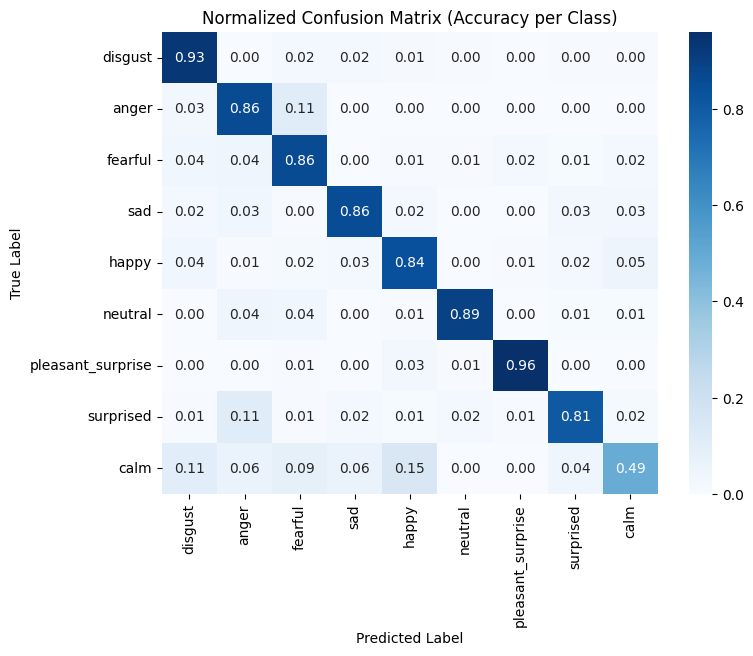

In [54]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Normalize Confusion Matrix (Row-wise Normalization)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot Confusion Matrix with Accuracy
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_norm, annot=True, fmt=".2f", cmap="Blues", xticklabels=['disgust', 'anger', 'fearful', 'sad', 'happy', 'neutral', 'pleasant_surprise', 'surprised', 'calm'], yticklabels=['disgust', 'anger', 'fearful', 'sad', 'happy', 'neutral', 'pleasant_surprise', 'surprised', 'calm'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix (Accuracy per Class)")
plt.show()
